Vikram Lucky's Capstone project

In [1]:
import pandas as pd 
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("DSI_kickstarterscrape_dataset.csv", encoding = 'Latin1')
df.head()


,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


KICKSTARTER_SCRAPE DATASET
    This data set contains information about more than 45000+ kickstarter projects. This dataset is consists of more than 45000 rows and 17 columns. The dataset contains projectID (unique 6 digit number for each project), Name, url, category, subcategory, location, status, goal, pledged, funded percentage, backers, funded date, levels, reward levels, updates, comments, and duration. Each column contains information which describes the project itself.Many projects, unfortunately, fail to reach its funding goal in which case the project is marked on Kickstarter as 'funding unsuccessful' and backers aren't charged for anything. In other words, the project needs to be funded successfully and met its funding deadline first before 'pledges' are charged. We will be working with this data, and we will try to find a way by performing some studies on informations in columns, so we can improve success rate of future projects by answering some Analytics questions.

### <p>Question 1</p>
#### What are the most popular categories for campaign? and Which states has the most campaigns?



In [4]:
df.describe()

,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


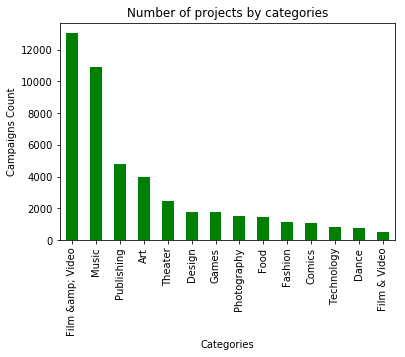

In [50]:
df.category.value_counts().plot(kind='bar', color = 'green')
plt.ylabel('Campaigns Count')
plt.title('Number of projects by categories')
plt.xlabel('Categories')
plt.show()

The graph above shows categories with most number of campaigns, here we see Film, Music and publishing tops the list. but this does not answer our question, these categories seems popular among kickstarters. But in order to find popular categories among  visitors we will have to dig little bit more.

Lets just see which category attracted more backers (folks who pledge money to join creators in bringing projects to life).

Axes(0.125,0.125;0.775x0.755)


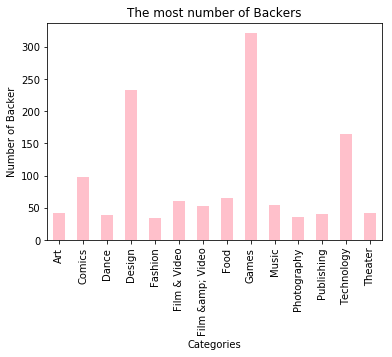

In [5]:
print(df.groupby('category').backers.mean().plot(kind = 'bar', color = 'pink'))
plt.title('The most number of Backers')
plt.xlabel('Categories')
plt.ylabel('Number of Backer')
plt.show()

Graph above represent categories on x-axis and number of backers on y-axis, and we can clearly see  <b> Design, Games and Technology </b> tops the list. They attracted the most number of Backers. In order to attract backers the project has to be interesting and popular, so far Design, Games and Technology looks in good shape. but we can not yet declare them as popular categories,  There are more information provided in the others columns which we can use for other studies. 
Now that we know which categories had the most backers, lets just see the mean pledge amount the received.

In [6]:
df.groupby('category').pledged.mean()



category
Art                  2712.840431
Comics               5065.365079
Dance                2626.772668
Design              20021.925779
Fashion              2546.425176
Film & Video         5163.861446
Film &amp; Video     4750.919764
Food                 5165.242530
Games               15239.981567
Music                3666.751764
Photography          2564.081902
Publishing           2398.671069
Technology          13623.771323
Theater              3025.339486
Name: pledged, dtype: float64

<b> Design, Games and Technology </b> tops the list again, as they received the most funds. But it does not necessary mean that these were the most successful categories. Now we can check if they were successful. In order to see which category had the most successful campaigns we have to group them by their status, where True will equals Successful campaign and False will equal a Failed campaign, we will exclude live campaigns.

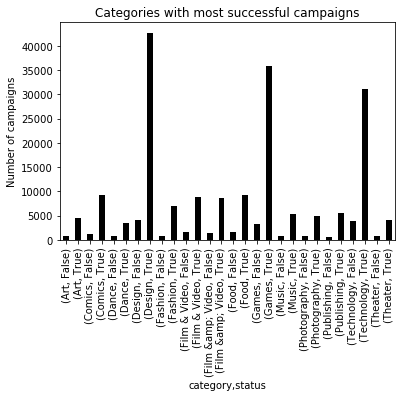

In [7]:
value = (df['status'] == 'successful') & (df['status'] != 'live')
df.groupby(['category', value]).pledged.mean().plot(kind='bar', color = 'black', width = .5)
plt.title('Categories with most successful campaigns')
plt.ylabel('Number of campaigns')
plt.show()


Graph above shows categories with the most number of successful campaigns, and <b> Design tops the list followed by Games, and Technology.</b> These 3 categories met their goal the most. Now Why did they met their goal the most? Were their Goal amount was way too low? compare to other categories!? Now we will have to look at their Average goal amount. Below graph have categories where true represents Successful campaigns and false Failed one. Games, Design and technolgy are still on top.

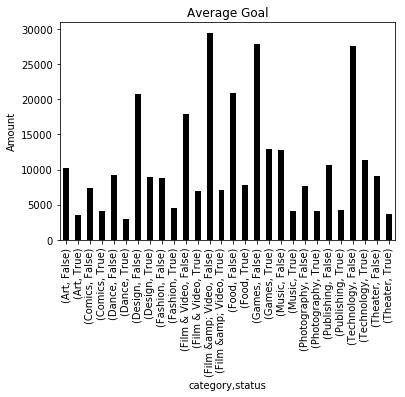

In [52]:
value = (df['status'] == 'successful') & (df['status'] != 'live')
df.groupby(['category', value]).goal.mean().plot(kind='bar', color = 'black', width = .5)
plt.title('Average Goal')
plt.ylabel('Amount')
plt.show()

comments columns contains number of comments by creators, which represents how involve they were with their audience. Gamers top the list with the most number of comments, which was also on top in our above chat.

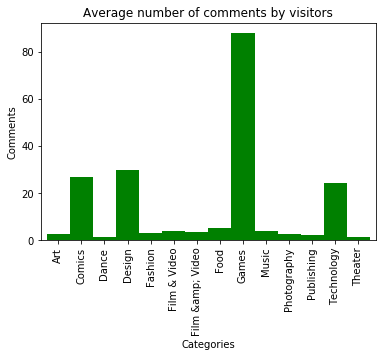

In [8]:
df.groupby('category').comments.mean().plot(kind = 'bar', color = 'green', width = 1)
plt.title('Average number of comments by visitors')
plt.ylabel('Comments')
plt.xlabel('Categories')
plt.show()

<b> Games tops the list followed by Design, comics and Technology. So answer to the question, As shown by the graphs above we are pretty to safe to say Design, Games and Technology are the most popular categories.</b>

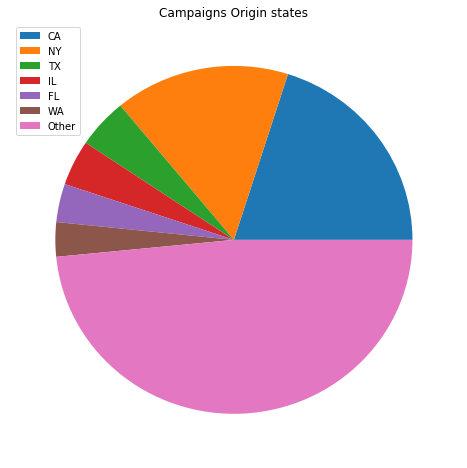

In [9]:
locations = df.location.str.split(',', 1).tolist()
locations = [x for x in locations  if str(x) != 'nan' ]
states = []
for entry in locations:
    c = entry[-1]
    c = c.strip()
    states.append(c)
states = pd.DataFrame(states, columns=['state'])
cntry_counts = pd.DataFrame(states.state.value_counts())
other = int(cntry_counts[6:].sum())
cntry_counts = cntry_counts[:6]
cntry_counts.loc[6] = other
cntry_counts = cntry_counts.rename(index={6: 'Other'})

plt.figure(figsize=(8, 8))
plt.pie(cntry_counts.state)
plt.title('Campaigns Origin states')
plt.legend(cntry_counts.index)
plt.show()

 <p> The pie graph above shows location with most number of campaigns. We seperated US States from the rest of the world and <b>California, New York and Texas </b> are the states with the most number of campaigns. These states are also know for their popularity amound startups, as they contain most number of startups.</p>

###  Question 2
#### What are the Key elements of an Successful Campaign?


Above we have seen categories with the most numner of successful campaigns. know we need to find out what are the most important things for an successful campaign. what do all the successful campaigns have in common, We will try to find a pattern here, so we can help improve success rate in our future campaigns.
Below we will create a new Dataframe with only successful and failed campaigns.

In [53]:
new_dataframe = pd.DataFrame()
success_failed = (df['status'] == 'successful') | (df['status'] == 'failed')
new_dataframe = df[success_failed].copy()


Now, that we have a dataframe which only contains failed and successful campaigns, we excluded other status because that wont factor in our study. In the first question we saw games, tech and design were on top of the list and they also had most number of comments by backers. Now we will look at communication side of project and see weather most numbers updates and comments leads to successful campaign.
Below we can comparing Failed campaigns with successful campaigns and see weather updates factor, Throughout the project, Creators usually communicate with backers and keep them informed of their progress. Project updates help keep backers in the loop.
updates are way to keep backers updated about campaigns.

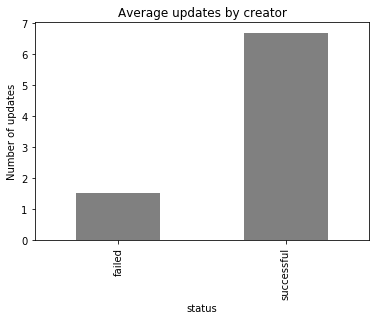

In [56]:
new_dataframe.groupby('status').updates.mean().plot(kind = 'bar', color = 'grey')
plt.title('Average updates by creator')
plt.ylabel('Number of updates')
plt.show()

Graph above shows Average number of updates by creator. Keeping backers engaged through interesting and shareable updates, and encourage them to spread the word about the progress. Backers aren’t just looking for updates on when their rewards will show up most of them love a look at the details of how work is actually made. so Showing them frequently will help succeed the project! Above we see Successful Campaigns have more updates than failed campaigns. So Frequent update is one the key to successful campaign.

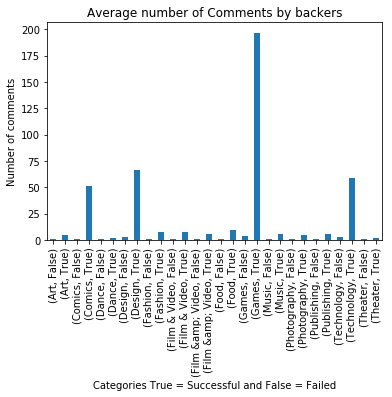

In [63]:
new_dataframe.groupby(['category', check]).comments.mean().plot(kind = 'bar')
plt.title('Average number of Comments by backers')
plt.ylabel('Number of comments')
plt.xlabel('Categories True = Successful and False = Failed')
plt.show()

Graph above shows Average number of comments by backers, on each type of category. It can been seen that most successful category of campaign in our case 'Games' had more numbers of comments and updates. which indicates Interaction between Creator and Backer is one of the most important key to successful campaign. Categories with the most number of updates are also the one with the most number of comments. So, Communication, Interaction between Creator and Backers is one of them most important key to a successul campaign.

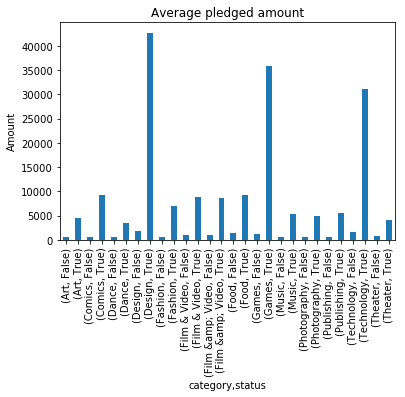

In [64]:
new_dataframe.groupby(['category', check]).pledged.mean().plot(kind = 'bar')
plt.title('Average pledged amount')
plt.ylabel('Amount')
plt.show()

Graph above represents average pledged amount by each category, it looks like Design tops the list. but Still design was not so successul category because as shown in graph above it was not so interesting category as it had not so solid numbers of comments and updates. This category lacked in number of ways, to name few it had way too many campaigns, and number of fail campaigns was way too high. Less Interaction between Creator and Backers. So overall we are pretty safe to say that an Intersting category for example <b>Games, Technology and Design</b> and a frequent interaction between creator and backers <b>via updates and comments</b> are the most important key to an successful campaigns.


### Question 3
#### Is there an ideal month/day/time to launch a campaign?


So far we have answered few questions that will help us organize our next successful campaign, we pretty much studied all the columns, and how they impact our campaigns. little details can make big impact, Now for this question we will be looking at funded date column. which contains starting date and time of every campaign. This little infomation can be really helpful, if we just think about it, what if we group all the successful campaign and see which month had more campaigns? we can have a perfect month to launch our next campaign. With the help of information above and with the information below, we can launch our next campaign, which will have strong chances of being an successful campaign.

Aug 1666
Apr 2929
Jun 1536
Dec 1725
Nov 1517
Jul 1511
Mar 2592
Oct 1530
Jan 1659
May 3044
Sep 1496
Feb 1764


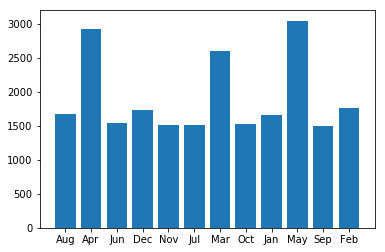

In [14]:
#success_dataframe = pd.DataFrame() 
#success_dataframe = df[check1].copy() #only contains successful campaigns

#var1 = df['funded date']
check1 = (df['status'] == 'successful')
success_dataframe = pd.DataFrame()
success_dataframe = df[check1].copy()

success_dataframe = success_dataframe['funded date']
new_list = success_dataframe.tolist()
trying = list()

test_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for each in new_list:
    new = each.split(' ')
    trying.append(new)

months = list()
for each in trying:
    if each[2] in test_list:
        months.append(each[2])
    else: 
        print("Please check month list, its invalid!")
new_dict = {}
for each in months:
    if each in new_dict:
        new_dict[each] = new_dict[each] + 1
    else:
        new_dict[each] = 1

for x, v in new_dict.items():
    print(x, v)
plt.bar(range(len(new_dict)), new_dict.values(), align='center')
plt.xticks(range(len(new_dict)), new_dict.keys())
plt.show()

ahhhh! This is intersting Bar graph above shows months with most number of successful campaigns. <b>March, April</b> and <b>May</b> have most numbers of successful campaigns. Campaign started in these months have more chances of reaching their goals than those started in any other months than these three months. If we look at the graph and think deeply actually it does make sense during these months Most of the people get their tax refund. That is the time of the year when they spend the most.  

Further research:
Would be to study the behavior of backers, by location and types of categories, and to predict where each category will have better chances of successful campaign.